# Natural Language Processing Project


## Problem Statement: 
Perform some exciting analysis using Natural Language Processing on a book.

__Book : *Alice's Adventures in Wonderland*__





## Contents In this Project covered:
- __Natural Language Processing analysis__
- __Sentiment Analysis__
- __Automatic Summary creation__ 
- __Wordcloud__

The Important one:
- __Self Question Answering System__

## 1.Natural Language Processing analysis

In [1]:
import nltk
import spacy
import numpy as np
import pandas as pd

from collections import Counter
from spacy import displacy
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = 'Alice Adventures in Wonderland.txt'
book = open(file).read()

nlp = spacy.load("en_core_web_sm")
book = nlp(book)

In [3]:
#preprocessing and cleaning
words = [token.text for token in book if not token.is_stop and not token.is_punct]
for i in words:
    if(i== '\n' or i == ' ' or i == '      ' or i == '\n\n' or i == '\n           ' or i == '\n          ' or i == '\n            ' or i == '\n\n\n\n' or i == '\n       ' or i =='\n\n\n\n\n\n\n\n\n\n\n\n' or i == '\n\n          ' or i== '\n             '):
        words.remove(i)


In [4]:
#word frequency
word_freq = Counter(words)
common_words = word_freq.most_common()
common_words=common_words[0:10]

## Total Sentances
sentences = list(book.sents)
len(sentences)

#word count just beautified
df6=pd.DataFrame(common_words, columns=['Word','Occurance'])
df6

,Word,Occurance
0,said,461
1,Alice,402
2,little,130
3,like,85
4,know,84
5,Project,83
6,Gutenberg,83
7,went,81
8,Queen,78
9,thought,73


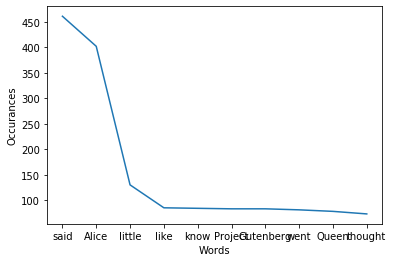

In [5]:
#plotting wirds as per their occurances
plt.plot(df6['Word'],df6['Occurance'])
plt.xlabel("Words")
plt.ylabel("Occurances")
plt.show()

In [6]:
nouns = []
adjectives = []
for token in book:
    if token.pos_ == 'NOUN':
        nouns.append(token)
    if token.pos_ == 'ADJ':
        adjectives.append(token)

In [44]:
list2=[]
#print("\nNoun phrases:", [chunk.text for chunk in book.noun_chunks])
#print("\nVerbs:", [token.lemma_ for token in book if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in book.ents:
    a=[entity.text, entity.label_]
    list2.append(a)

In [45]:
df2 = pd.DataFrame(list2,columns = ['TEXT','Label'])
df2.head(10)

,TEXT,Label
0,Alice's Adventures,ORG
1,Wonderland,GPE
2,Lewis Carroll,PERSON
3,eBook,ORG
4,eBook,ORG
5,Alice's Adventures,WORK_OF_ART
6,Arthur Rackham,PERSON
7,Austin Dobson,PERSON
8,Lewis Carroll,PERSON
9,Arthur Rackham,PERSON


In [9]:
list1=[]
for token in book:
    a=[token.text,token.lemma_,token.pos_,token.dep_,token.shape_,token.is_stop]
    list1.append(a)

In [46]:
df = pd.DataFrame(list1,columns = ['TEXT','LEMMA','POS','DEP','SHAPE','STOP'])
df.head(10)

,TEXT,LEMMA,POS,DEP,SHAPE,STOP
0,Project,Project,PROPN,compound,Xxxxx,False
1,Gutenberg,Gutenberg,PROPN,poss,Xxxxx,False
2,'s,'s,PART,case,'x,True
3,Alice,Alice,PROPN,poss,Xxxxx,False
4,'s,'s,PART,case,'x,True
5,Adventures,Adventures,PROPN,ROOT,Xxxxx,False
6,in,in,ADP,prep,xx,True
7,Wonderland,Wonderland,PROPN,pobj,Xxxxx,False
8,",",",",PUNCT,punct,",",False
9,by,by,ADP,prep,xx,True


In [47]:
#list(df.groupby(['POS']))

In [12]:
##Total Stop Words in the Document: 
df.groupby(['STOP']).count()

,TEXT,LEMMA,POS,DEP,SHAPE
STOP,,,,,
False,24100,24100,24100,24100,24100
True,18744,18744,18744,18744,18744


In [13]:
len(df[df['STOP']== True])

18744

Total Stop Words in the Document: 3097

In [14]:
df.groupby(['POS']).count()

,TEXT,LEMMA,DEP,SHAPE,STOP
POS,,,,,
ADJ,1654,1654,1654,1654,1654
ADP,3139,3139,3139,3139,3139
ADV,2407,2407,2407,2407,2407
AUX,1790,1790,1790,1790,1790
CCONJ,1323,1323,1323,1323,1323
DET,4084,4084,4084,4084,4084
INTJ,150,150,150,150,150
NOUN,4200,4200,4200,4200,4200
NUM,308,308,308,308,308


## 2.Sentiment Analysis:

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [16]:
df=pd.read_csv("alice.csv")
df.head()

,Chapter Number,Chapter Name,Paragraphs
0,Chapter I,Down the Rabbit-Hole,ALICE was beginning to get very tired of sitti...
1,Chapter II,THE POOL OF TEARS,"""CURIOUSER and curiouser!"" cried Alice (she wa..."
2,CHAPTER III,A Caucus-race and a Long Tale,THEY were indeed a queer-looking party that as...
3,CHAPTER IV,The Rabbit sends in a Little Bill,"IT was the White Rabbit, trotting slowly back ..."
4,CHAPTER V,Advice from a Caterpillar,THE Caterpillar and Alice looked at each other...


In [17]:
chapter1=df['Paragraphs'][0]
chapter2=df['Paragraphs'][1]
chapter3=df['Paragraphs'][2]
chapter4=df['Paragraphs'][3]
chapter5=df['Paragraphs'][4]
chapter6=df['Paragraphs'][5]
chapter7=df['Paragraphs'][6]
chapter8=df['Paragraphs'][7]
chapter9=df['Paragraphs'][8]
chapter10=df['Paragraphs'][9]
chapter11=df['Paragraphs'][10]
chapter12=df['Paragraphs'][11]
chapters=[chapter1,chapter2,chapter3,chapter4,chapter5,chapter6,chapter7,chapter8,chapter9,chapter10,chapter11,chapter12]

In [18]:
sentiments=[]
sents=[]
analyzer = SentimentIntensityAnalyzer()
for i in chapters:
    blob = TextBlob(i)
    s=(blob.sentiment)
    sentiments.append(s)
    vs = analyzer.polarity_scores(i)
    sents.append(vs)

 __i] Positivity & Negativity :__ 

In [19]:
sents
j=1
print("Chapterwise sentiments: ")
for i in sents:
    print("Chapter ",j,"- Positivity:",i['pos']," Negativity:",i['neg'],)
    j+=1

Chapterwise sentiments: 
Chapter  1 - Positivity: 0.099  Negativity: 0.075
Chapter  2 - Positivity: 0.106  Negativity: 0.096
Chapter  3 - Positivity: 0.105  Negativity: 0.076
Chapter  4 - Positivity: 0.105  Negativity: 0.073
Chapter  5 - Positivity: 0.068  Negativity: 0.081
Chapter  6 - Positivity: 0.085  Negativity: 0.082
Chapter  7 - Positivity: 0.075  Negativity: 0.067
Chapter  8 - Positivity: 0.097  Negativity: 0.081
Chapter  9 - Positivity: 0.065  Negativity: 0.112
Chapter  10 - Positivity: 0.117  Negativity: 0.107
Chapter  11 - Positivity: 0.076  Negativity: 0.069
Chapter  12 - Positivity: 0.087  Negativity: 0.079


__ii] Polarity & Subjectivity :__

In [20]:
j=1
for i in sentiments:
    print("For Chapter",j,":- Polarity is", i[0],"   Subjectivity is",i[1])
    j=j+1

For Chapter 1 :- Polarity is 0.022248451094718864    Subjectivity is 0.501498780313946
For Chapter 2 :- Polarity is 0.02364218281421147    Subjectivity is 0.5097569322950035
For Chapter 3 :- Polarity is 0.041883791816389834    Subjectivity is 0.45876762489507594
For Chapter 4 :- Polarity is 0.03896634078811811    Subjectivity is 0.4974561202686205
For Chapter 5 :- Polarity is 0.006358060317938491    Subjectivity is 0.4694113341147242
For Chapter 6 :- Polarity is 0.005957796383143602    Subjectivity is 0.5590472516166963
For Chapter 7 :- Polarity is 0.05091041518702651    Subjectivity is 0.5383549107142857
For Chapter 8 :- Polarity is 0.006033353884276017    Subjectivity is 0.47611219533350707
For Chapter 9 :- Polarity is 0.05673681869991707    Subjectivity is 0.4399028099560013
For Chapter 10 :- Polarity is 0.14063449240607512    Subjectivity is 0.5922921662669863
For Chapter 11 :- Polarity is 0.026882977843915332    Subjectivity is 0.4585039682539685
For Chapter 12 :- Polarity is 0.08

## 3.Automatic Summary Creation:

In [21]:
def _create_frequency_table(text_string) -> dict:
    
    stopWords = set(stopwords.words("english"))
    words = word_tokenize(text_string)
    ps = PorterStemmer()

    freqTable = dict()
    for word in words:
        word = ps.stem(word)
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    return freqTable

In [22]:
##score a sentence by its words
##Algorithm: adding the frequency of every non-stop word in a sentence divided by total no of words in a sentence.
def _score_sentences(sentences, freqTable) -> dict:
    sentenceValue = dict()
    for sentence in sentences:
        word_count_in_sentence = (len(word_tokenize(sentence)))
        word_count_in_sentence_except_stop_words = 0
        for wordValue in freqTable:
            if wordValue in sentence.lower():
                word_count_in_sentence_except_stop_words += 1
                if sentence[:10] in sentenceValue:
                    sentenceValue[sentence[:10]] += freqTable[wordValue]
                else:
                    sentenceValue[sentence[:10]] = freqTable[wordValue]

        if sentence[:10] in sentenceValue:
            sentenceValue[sentence[:10]] = sentenceValue[sentence[:10]] / word_count_in_sentence_except_stop_words

    return sentenceValue

In [23]:
##Find the average score from the sentence value dictionary
def _find_average_score(sentenceValue) -> int:
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]
    average = (sumValues / len(sentenceValue))     # Average value of a sentence from original text
    return average

In [24]:
def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''
    for sentence in sentences:
        if sentence[:10] in sentenceValue and sentenceValue[sentence[:10]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1
    return summary

In [25]:
def run_summarization(text):

    freq_table = _create_frequency_table(text) # 1 Create the word frequency table
    sentences = sent_tokenize(text) # 2 Tokenize the sentences
    sentence_scores = _score_sentences(sentences, freq_table) # 3 Important Algorithm: score the sentences    
    threshold = _find_average_score(sentence_scores) # 4 Find the threshold
    summary = _generate_summary(sentences, sentence_scores, 1.3 * threshold) # 5 Important Algorithm: Generate the summary

    return summary

In [26]:
j=1
for i in chapters:
    result = run_summarization(i)
    print("Summary for Chapter ",j," : ")
    print("\n")
    j=j+1
    print("\t",result)
    print("\n\n")

Summary for Chapter  1  : 


	  Down, down, down. Down, down, down. Dinah, my dear, I wish you were down here with me! But do cats eat bats, I wonder?" and sometimes,
"Do bats eat cats?" when suddenly, thump! down
she came upon a heap of sticks and dry leaves, and the fall was over. Oh, how I wish I could
shut up like a telescope! I think I could, if I only knew how to begin." It was all very well to say "Drink me," but the wise little Alice was
not going to do _that_ in a hurry. said Alice. "Come, there's no use in crying like that!" said Alice to herself,
rather sharply. So she set to work, and very soon finished off the cake.



Summary for Chapter  2  : 


	  Good-bye, feet!" Alice's Right Foot, Esq. Oh dear, what nonsense I'm talking!" Poor Alice! Stop this
moment, I tell you!" the Duchess, the Duchess! Oh! "Dear, dear! Ah, _that's_ the great puzzle!" she knows such a
very little! said Alice, a good deal frightened at the
sudden change, but very glad to find herself still in exist

in she went.



Summary for Chapter  8  : 


	  "I couldn't help it," said Five, in a sulky tone. said Five. "What for?" "Yes, it _is_ his business!" said Five. "Would you tell me," said Alice, a little timidly, "why you are painting
those roses?" Five and Seven said nothing, but looked at Two. The Queen!" There was a sound of many footsteps,
and Alice looked round, eager to see the Queen. So she stood still where she was, and
waited. She said it to the
Knave of Hearts, who only bowed and smiled in reply. said the Queen, tossing her head impatiently; and turning to
Alice, she went on, "What's your name, child?" said the Queen, pointing to the three gardeners
who were lying round the rose-tree; for, you see, as they were lying on
their faces, and the pattern on their backs was the same as the rest of
the pack, she could not tell whether they were gardeners, or soldiers,
or courtiers, or three of her own children. said Alice, surprised at her own courage. The Queen turned crimson with fu

"I didn't!" "You did!" said the Hatter. "I deny it!" said the March Hare. "He denies it," said the King: "leave out that part." one of the jury asked. "That I can't remember," said the Hatter. "I'm a poor man, your Majesty," he began. "You're a _very_ poor _speaker_," said the King. "Then you may _sit_ down," the King replied. Here the other guinea-pig cheered, and was suppressed. "Come, that finishes the guinea-pigs!" thought Alice. said the King. "Give your evidence," said the King. "Sha'n't," said the cook. "Pepper, mostly," said the cook. "Treacle," said a sleepy voice behind her. "Collar that Dormouse," the Queen shrieked out. said the King, with an air of great relief.



Summary for Chapter  12  : 


	  "Oh, I _beg_ your pardon!" the King said to Alice. "Nothing," said Alice. persisted the King. "Nothing whatever," said Alice. "That's very important," the King said, turning to the jury. Some of the jury wrote it down "important," and some "unimportant." "_I'm_ not a mile high," 

In [27]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

In [28]:
file = open("Alice Adventures in Wonderland.txt", "r")
lines = file.readlines()
file.close()

for i in lines:
    if(i == '\n'):
        lines.remove(i)
        
book1=''.join(lines)

In [29]:
list3=[]
for ent in book.ents:
    a=(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))
    list3.append(a)


In [30]:
df = pd.DataFrame(list3,columns = ['TEXT','StartChar','EndChar','Label','LExp'])
df.head(15)

,TEXT,StartChar,EndChar,Label,LExp
0,Alice's Adventures,20,38,ORG,"Companies, agencies, institutions, etc."
1,Wonderland,42,52,GPE,"Countries, cities, states"
2,Lewis Carroll,57,70,PERSON,"People, including fictional"
3,eBook,77,82,ORG,"Companies, agencies, institutions, etc."
4,eBook,284,289,ORG,"Companies, agencies, institutions, etc."
5,Alice's Adventures,330,348,WORK_OF_ART,"Titles of books, songs, etc."
6,Arthur Rackham,385,399,PERSON,"People, including fictional"
7,Austin Dobson,417,430,PERSON,"People, including fictional"
8,Lewis Carroll,440,453,PERSON,"People, including fictional"
9,Arthur Rackham,468,482,PERSON,"People, including fictional"


In [31]:
df1 = df.groupby('Label').size()
df1

Label
CARDINAL       252
DATE            67
FAC             21
GPE             44
LANGUAGE         9
LAW              9
LOC              8
MONEY            4
NORP            13
ORDINAL         60
ORG            190
PERCENT          1
PERSON         695
PRODUCT         18
QUANTITY        15
TIME            41
WORK_OF_ART    123
dtype: int64

In [32]:
# Characters from the book

dff=df[df['Label']=='PERSON']
Char=dff['TEXT'].unique()
print("Total Characters :",len(Char))
print("Characters from the book: \n",Char)

Total Characters : 92
Characters from the book: 
 ['Lewis Carroll' 'Arthur Rackham' 'Austin Dobson' 'WONDERLAND' 'Jana Srna'
 'Alice' 'Costumier' 'Tertia' 'Wonderland' 'Mary Ann' 'ALICE' 'Down'
 'Longitude' 'Latitude' "Ma'am" 'Dinah' 'Rabbit' 'Hearthrug' 'CURIOUSER'
 'Geography' 'Mabel' 'hippopotamus' 'Latin Grammar' 'Mouse'
 'William the Conqueror' 'mice----oh' 'a Long Tale_]' 'William' 'Edwin'
 'Morcar' 'Mercia' 'Lory' 'Edgar Atheling' 'Shakespeare' 'Dodo' 'Ma'
 'Alice aloud' 'Magpie' 'Run' "Dinah'll" 'Pat' 'Bill' 'Heads' 'Jack'
 'Lizard' 'Advice' 'William_' 'Frog' 'Footman' 'Duchess' 'riddles.--I'
 'the Queen of Hearts' 'Queen' 'Lacie' 'Tillie' 'then_--she' 'Miss'
 'The Queen' 'Cat' 'The Mock' '_ a Duchess' "is--'Oh" 'Somebody' 'Gryphon'
 'Classical' 'Laughing' 'Grief' 'Swim' 'Said' 'The Mock Turtle' 'Shark'
 '_' 'Owl' 'Beau' 'Soo' 'Hatter' 'King' 'Knave' 'true_--' "course--'_If"
 'Transcriber' 'eBooks' 'FULL LICENSE' 'Gutenberg-tm' 'Gutenberg'
 'Project Gutenberg-tm' 'Michael\n' 'S

## 4.Wordcloud:
__Chapters I - XII__

WordCloud For Chapters  1  : 


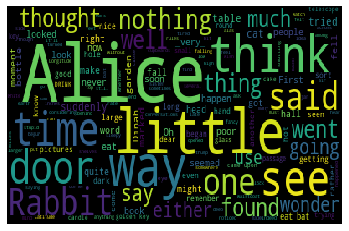




WordCloud For Chapters  2  : 


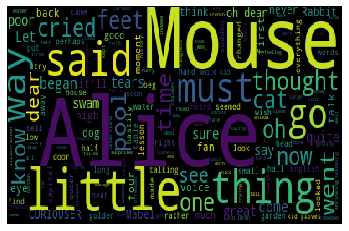




WordCloud For Chapters  3  : 


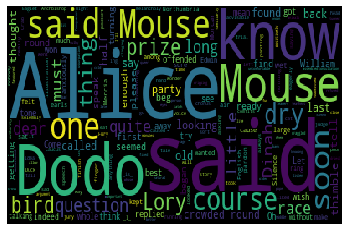




WordCloud For Chapters  4  : 


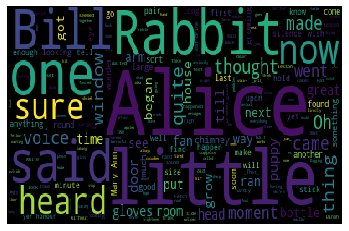




WordCloud For Chapters  5  : 


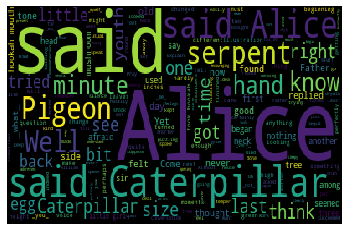




WordCloud For Chapters  6  : 


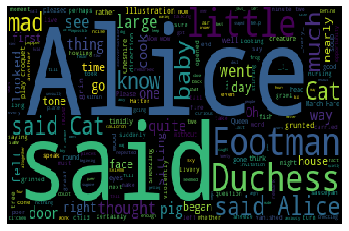




WordCloud For Chapters  7  : 


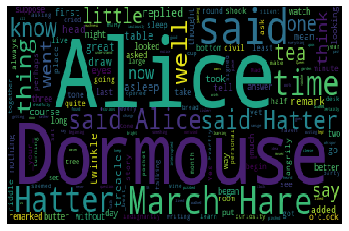




WordCloud For Chapters  8  : 


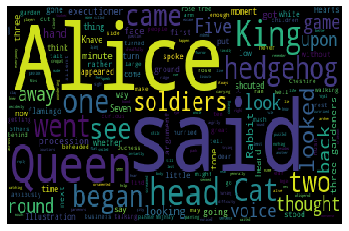




WordCloud For Chapters  9  : 


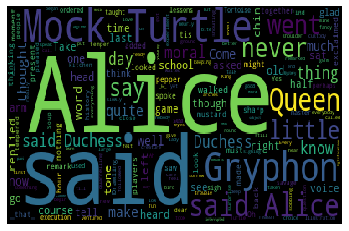




WordCloud For Chapters  10  : 


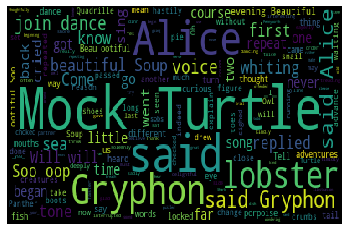




WordCloud For Chapters  11  : 


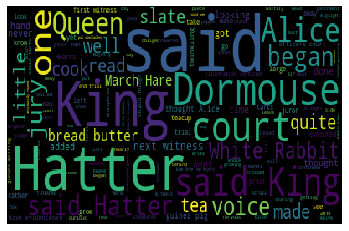




WordCloud For Chapters  12  : 


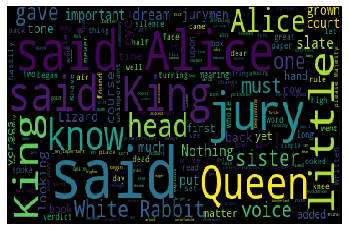

In [33]:
j=1
for i in chapters:
    print("WordCloud For Chapters ",j," : ")
    wordcloud = WordCloud(stopwords = STOPWORDS).generate(i)
    j=j+1
    plt.imshow(wordcloud,aspect= 'auto')
    plt.axis("off")
    plt.show()
    print("\n\n")

## 5.Self Question Answering System :

In [34]:
#Pdf File CQDA
import os
import pandas as pd
from ast import literal_eval

from cdqa.utils.converters import pdf_converter
from cdqa.utils.filters import filter_paragraphs
from cdqa.pipeline import QAPipeline
from cdqa.utils.download import download_model

C:\Users\khist\Anaconda3\lib\site-packages\tqdm\autonotebook\__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [35]:
# Download model
download_model(model='bert-squad_1.1', dir='./models')


bert_qa.joblib already downloaded


In [36]:
#specify data path
df = pdf_converter(directory_path='./data/pdf/')
df.head()

,title,paragraphs
0,Chapter I,[ALICE was beginning to get very tired of sitt...
1,Chapter II,"[""CURIOUSER and curiouser!"" cried Alice (she w..."
2,Chapter III,[THEY were indeed a queer-looking party that a...
3,Chapter IV,"[IT was the White Rabbit, trotting slowly back..."
4,Chapter IX,"[""YOU can't think how glad I am to see you aga..."


In [37]:
#Use Pre Defined Readering Models to train the data prediction
cdqa_pipeline = QAPipeline(reader='./models/bert_qa.joblib', max_df=1.0)

# Fit Retriever to documents
cdqa_pipeline.fit_retriever(df=df)

QAPipeline(reader=BertQA(adam_epsilon=1e-08, bert_model='bert-base-uncased',
                         do_lower_case=True, fp16=False,
                         gradient_accumulation_steps=1, learning_rate=5e-05,
                         local_rank=-1, loss_scale=0, max_answer_length=30,
                         n_best_size=20, no_cuda=False,
                         null_score_diff_threshold=0.0, num_train_epochs=3.0,
                         output_dir=None, predict_batch_size=8, seed=42,
                         server_ip='', server_po..._size=8,
                         verbose_logging=False, version_2_with_negative=False,
                         warmup_proportion=0.1, warmup_steps=0),
           retrieve_by_doc=False,
           retriever=BM25Retriever(b=0.75, floor=None, k1=2.0, lowercase=True,
                                   max_df=1.0, min_df=2, ngram_range=(1, 2),
                                   preprocessor=None, stop_words='english',
                                   t

## Ask Questions Now!!


### Sample Questions:

In [38]:
#Question 
query = 'who was considering in her own mind?'
prediction = cdqa_pipeline.predict(query)

#following prints the prediction based on question asked. stating what is the answer and where it found it.
print('query: {}'.format(query))
print('answer: {}'.format(prediction[0]))
print('title: {}'.format(prediction[1]))
print('paragraph: {}'.format(prediction[2]))

query: who was considering in her own mind?
answer: Alice
title: Chapter I
paragraph: ALICE was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, "and what is the use of a book," thought Alice, "without pictures or conversations?" So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid) whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her. There was nothing so _very_ remarkable in that; nor did Alice think it so _very_ much out of the way to hear the Rabbit say to itself, "Oh dear! 


In [39]:
#Question
query = 'who stole the tarts?'
prediction = cdqa_pipeline.predict(query)

#Answer:
print('query: {}'.format(query))
print('answer: {}'.format(prediction[0]))
print('title: {}'.format(prediction[1]))
print('paragraph: {}'.format(prediction[2]))

query: who stole the tarts?
answer: The Knave of Hearts
title: Chapter XI
paragraph: On this the White Rabbit blew three blasts on the trumpet, and then unrolled the parchment scroll, and read as follows:            "The Queen of Hearts, she made some tarts,               All on a summer day:           The Knave of Hearts, he stole those tarts,               And took them quite away!"  "Consider your verdict," the King said to the jury.  "Not yet, not yet!" the Rabbit hastily interrupted. "There's a great deal to come before that!"  "Call the first witness," said the King; and the Rabbit blew three blasts on the trumpet, and called out "First witness!"  


In [40]:
#Question
query = 'what did the young crab say?'
prediction = cdqa_pipeline.predict(query)

#Answer:
print('query: {}'.format(query))
print('answer: {}'.format(prediction[0]))
print('title: {}'.format(prediction[1]))
print('paragraph: {}'.format(prediction[2]))

query: what did the young crab say?
answer: "Hold your tongue
title: Chapter III
paragraph: The Mouse only growled in reply.  "Please come back and finish your story!" Alice called after it. And the others all joined in chorus, "Yes, please do!" but the Mouse only shook its head impatiently and walked a little quicker.  "What a pity it wouldn't stay!" sighed the Lory, as soon as it was quite out of sight; and an old Crab took the opportunity of saying to her daughter, "Ah, my dear! Let this be a lesson to you never to lose _your_ temper!" "Hold your tongue, Ma!" said the young Crab, a little snappishly. "You're enough to try the patience of an oyster!"  "I wish I had our Dinah here, I know I do!" said Alice aloud, addressing nobody in particular. "She'd soon fetch it back!"  "And who is Dinah, if I might venture to ask the question?" said the 


In [41]:
#Question
query = 'who shook his head mournfully?'
prediction = cdqa_pipeline.predict(query)

#Answer:
print('query: {}'.format(query))
print('answer: {}'.format(prediction[0]))
print('title: {}'.format(prediction[1]))
print('paragraph: {}'.format(prediction[2]))

query: who shook his head mournfully?
answer: The Hatter
title: Chapter VII
paragraph: The Hatter shook his head mournfully. "Not I!" he replied. "We quarrelled last March----just before _he_ went mad, you know----" (pointing with his teaspoon to the March Hare), "it was at the great concert given by the Queen of Hearts, and I had to sing            'Twinkle, twinkle, little bat!           How I wonder what you're at!'  


In [42]:
#Question
query = 'who slowly opened his eyes?'
prediction = cdqa_pipeline.predict(query)

#Answer:
print('query: {}'.format(query))
print('answer: {}'.format(prediction[0]))
print('title: {}'.format(prediction[1]))
print('paragraph: {}'.format(prediction[2]))

query: who slowly opened his eyes?
answer: The Dormouse
title: Chapter VII
paragraph: The Dormouse slowly opened his eyes. "I wasn't asleep," he said in a hoarse, feeble voice: "I heard every word you fellows were saying."  "Tell us a story!" said the March Hare.  "Yes, please do!" pleaded Alice.  "And be quick about it," added the Hatter, "or you'll be asleep again before it's done."  "Once upon a time there were three little sisters," the Dormouse began in a great hurry; "and their names were Elsie, Lacie, and Tillie; and they lived at the bottom of a well----"  "What did they live on?" said Alice, who always took a great interest in questions of eating and drinking.  "They lived on treacle," said the Dormouse, after thinking a minute or two.  "They couldn't have done that, you know," Alice gently remarked; "they'd have been ill."  "So they were," said the Dormouse; "_very_ ill."  


In [43]:
#Question
query = 'who was in great hurry?'
prediction = cdqa_pipeline.predict(query)

#Answer:
print('query: {}'.format(query))
print('answer: {}'.format(prediction[0]))
print('title: {}'.format(prediction[1]))
print('paragraph: {}'.format(prediction[2]))

query: who was in great hurry?
answer: the White Rabbit
title: Chapter II
paragraph: CURIOUSER] After a time she heard a little pattering of feet in the distance, and she hastily dried her eyes to see what was coming. It was the White Rabbit returning, splendidly dressed, with a pair of white kid gloves in one hand and a large fan in the other: he came trotting along in a great hurry, muttering to himself as he came, "Oh! the Duchess, the Duchess! Oh! won't she be savage if I've kept her waiting!" 


# Conclusion:

In this Project, I have implemented Self Question Answering System using CDQA module. Along with this, Automatic summary creation, wordcloud, sentiment analysis, Natural Language Processing analysis.

## Libraries Used :

- __Pandas__
- __Numpy__
- __matplotlib__
- __NLTK__ 
- __Spacy__
- __TextBlob__
- __wordcloud__
- __vaderSentiment__
- __CDQA__

# *Author*:
__Pranav Khiste__<br>
__Department: Information Systems__<br>
__Northeastern University__<br>

# Licensing

__Copyright 2020 Pranav Sanjay Khiste__

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.